# Assignment 2- CSC 605 Advanced programming 

## Block matrix multiplication using threading

### Student name: Alhanouf Saud Makki
### ID: 431000020

### Matrix multiplication is one of the most fundamental tasks in mathematics and computer science. Multiplication of two matrices is possible only when number of columns in first matrix equals number of rows in second matrix. 


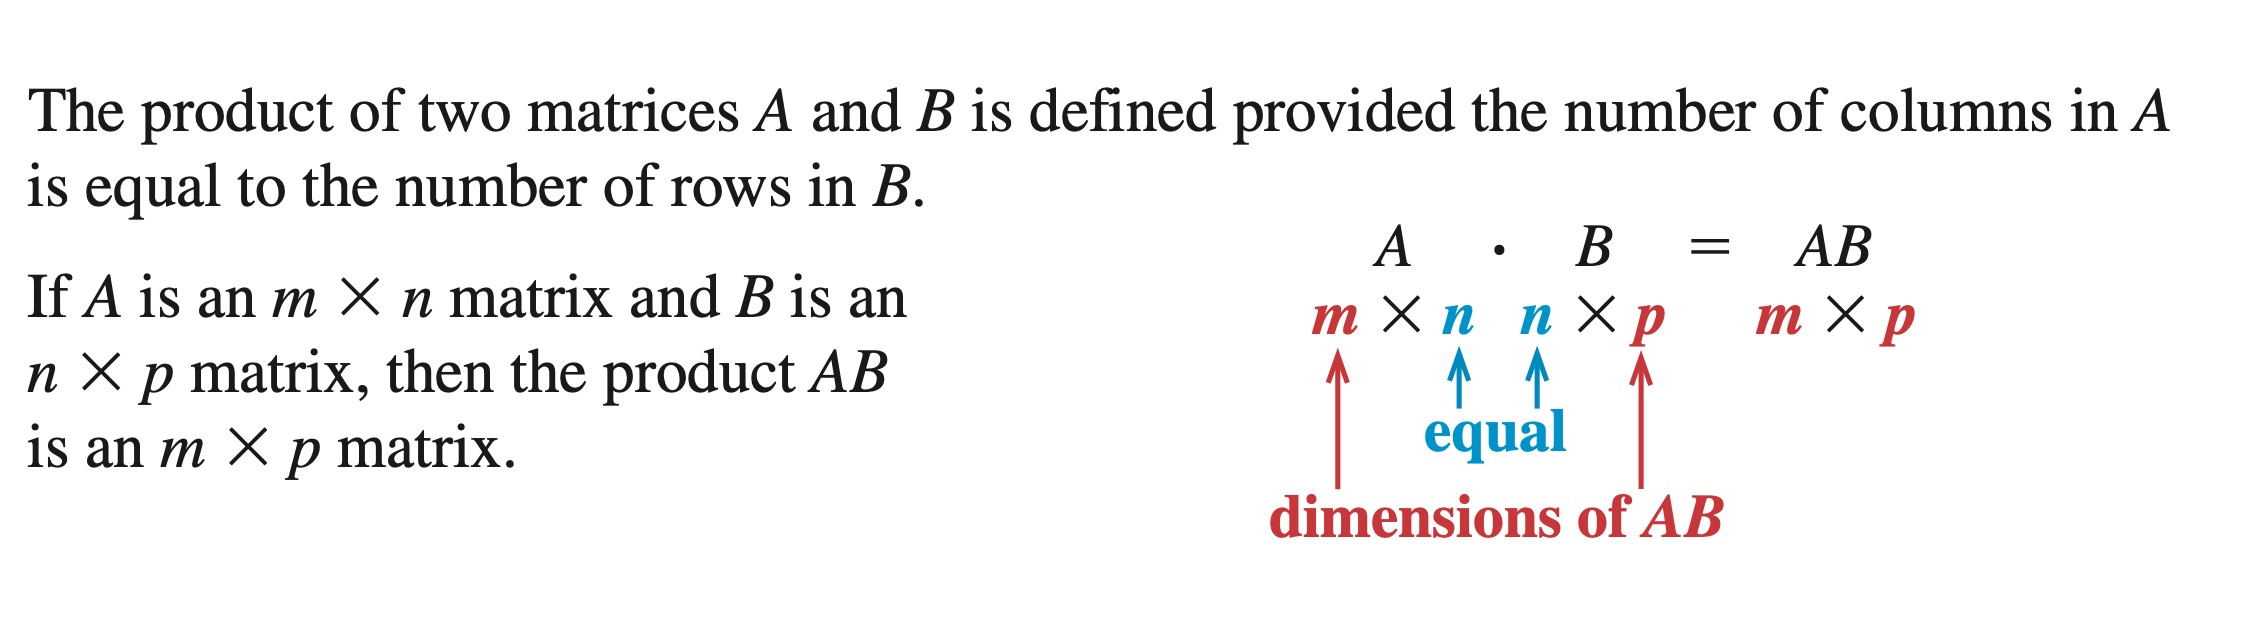

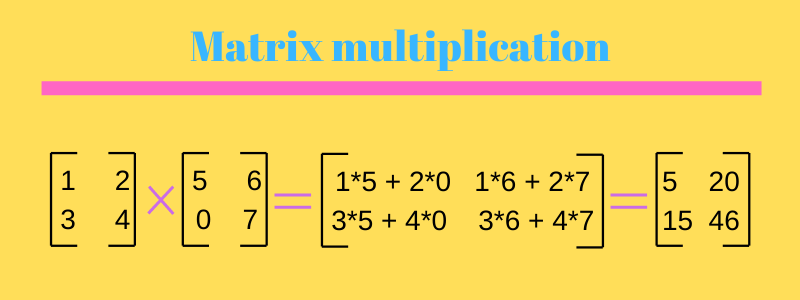

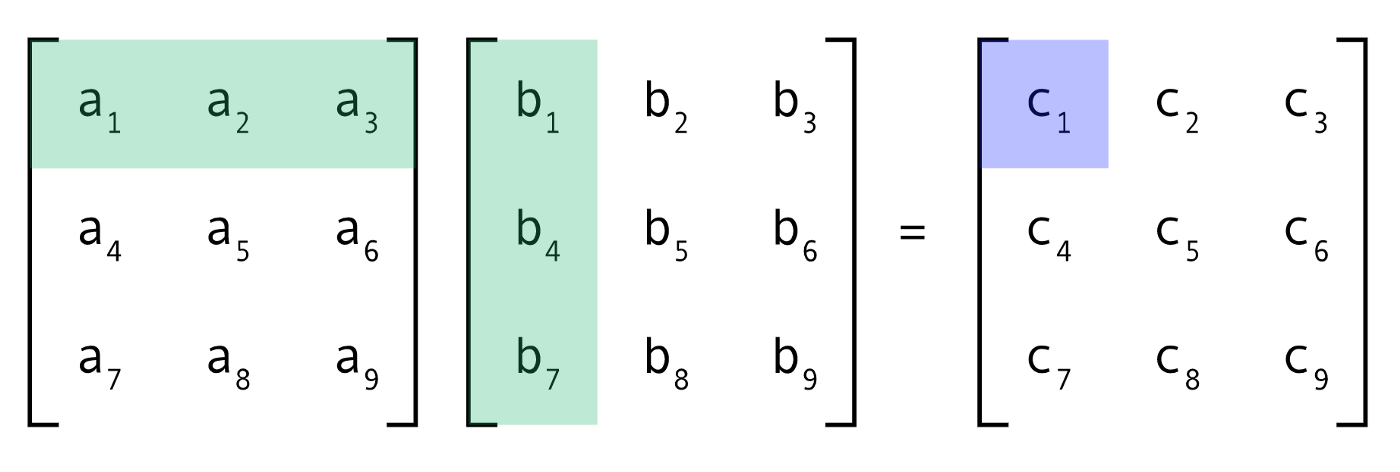

While the product of two $n × n$ matrices over a field can naturally be computed in $ O(n^3)$ arithmetic operations. Multi-threading can be done to improve it. In multi-threading, instead of utilizing a single core of the processor, utilizing all or more core to solve the problem. As a result, this reduces the time computation. Many different algorithms have been designed for multiplying matrices in parallel fashion. For example, block matrix multiplcation works by dividing the matrices into blocks and each thread calculates results of one block only. 


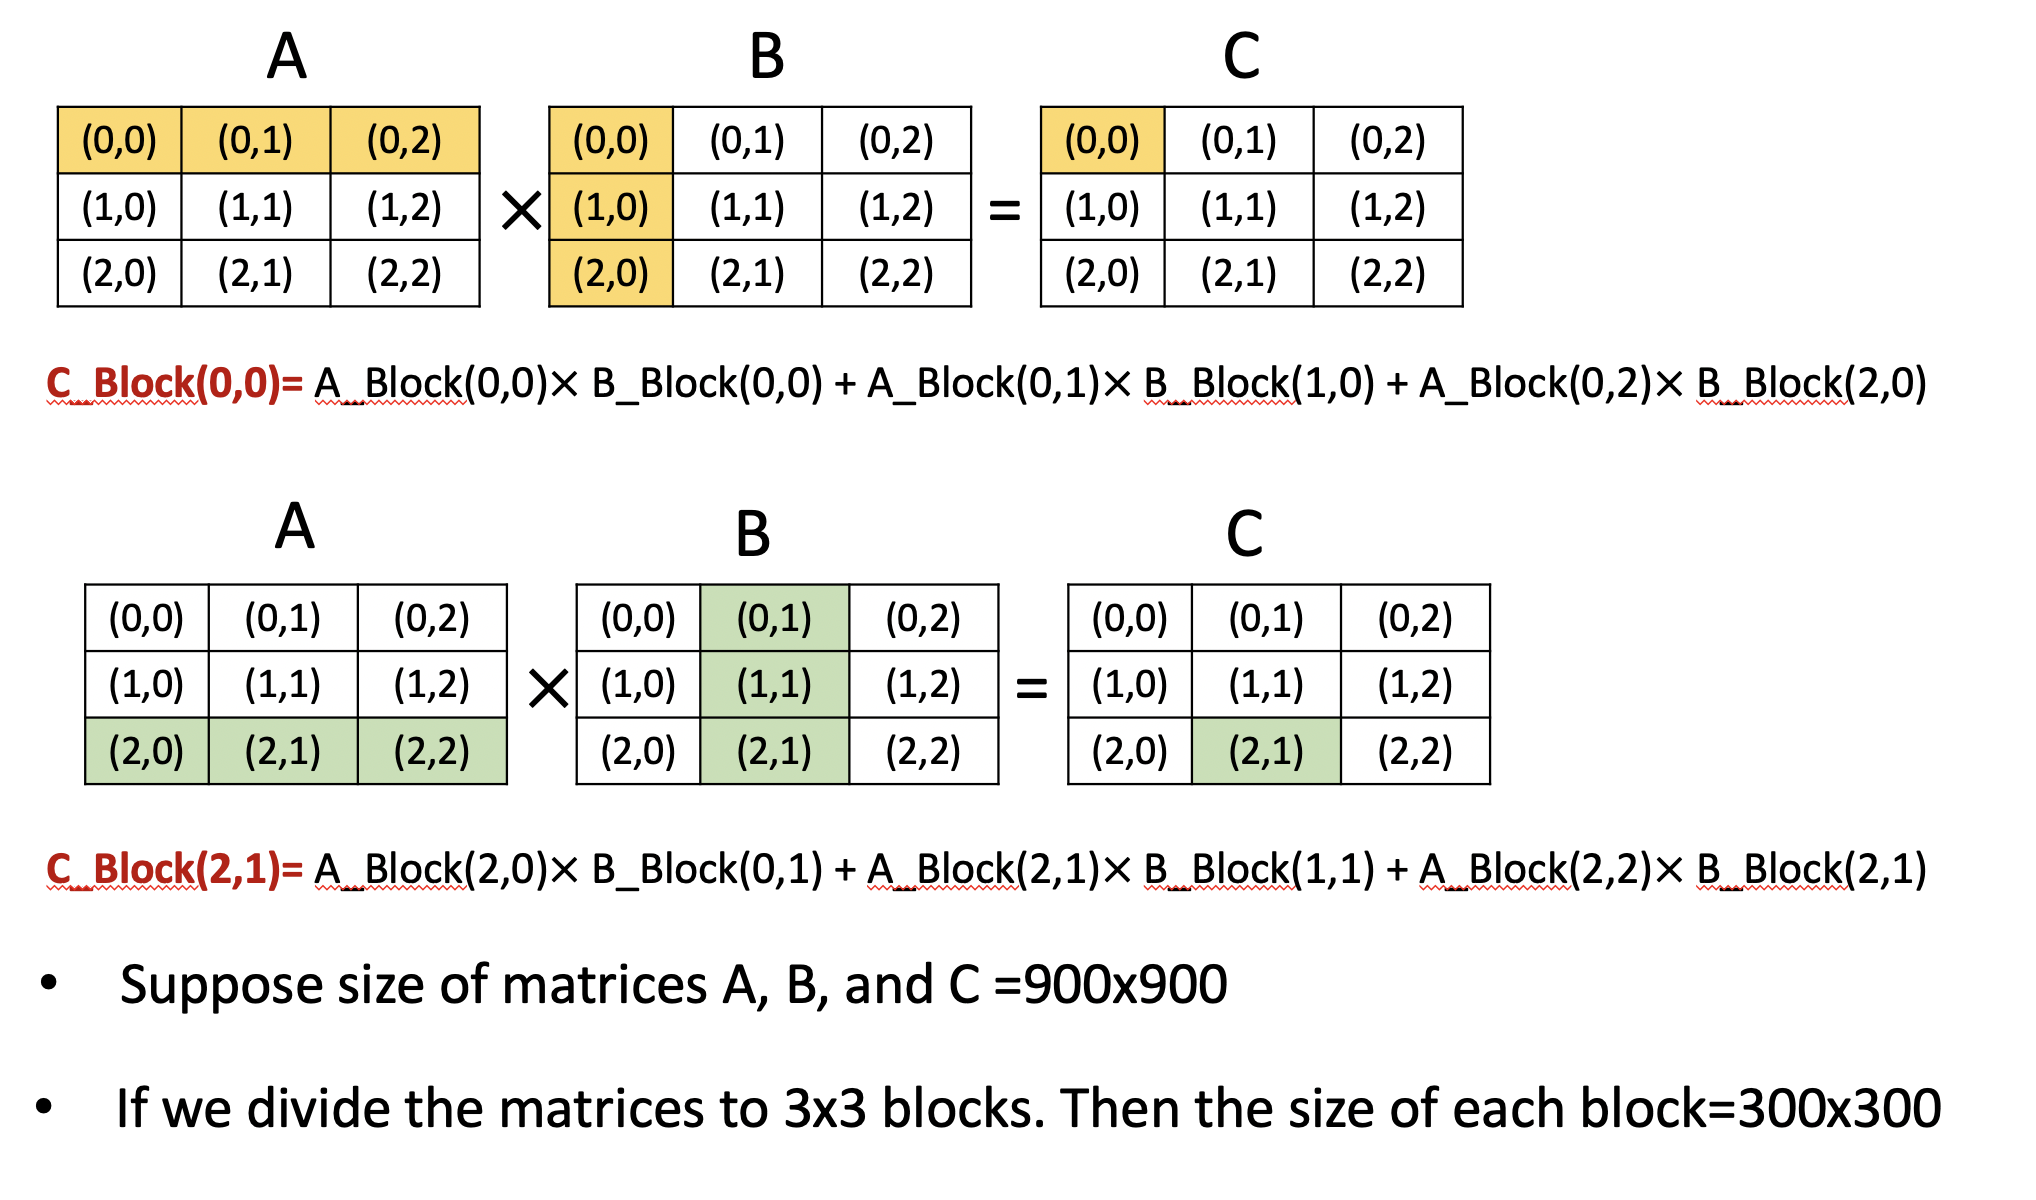

In [11]:
import numpy as np
import time


#### This code is for helping you to understand the aissgnment

In [12]:
"""
   Create a matrix with size mxn- Return random integers from `low`=-100 `high`=100.
   :param m: number of rows
   :param n:number of columns
   :return: generated random matrix 
"""
np.random.seed=32
def createMatrix(m,n):
    ## write your code here
    return np.random.randint(100, size=(m,n))
  
"""
Multiply two matrices (A and B) and return the result (matrix C). Uses a single thread only.
   :param A: Matrix A
   :param B: Matrix B
   :return: C: Matrix multiplication of A and B
"""
def multiplyMatrices(A,B):
    r, c = A.shape
    r1, c1 = B.shape
    C = np.zeros((r, c1))
    for i in range(r): 
        for j in range(c1): 
            for k in range(c): 
                C[i][j] += A[i][k] * B[k][j]
    return C

"""
This method aims to check if the multiplication result using threading and blocks is equal to multiplication 
result using np.matmul
   :param C1: is matrix which is the results of AxB using block multiplciaton
   :param C2:is matrix which is the results of AxB using np.matmul to validate our solution
"""
def check_the_solution(C1,C2):
    anw=np.abs(np.sum(C2-C1))
    print(anw)
    if anw==0:
        print('answer is correct')
    else:
        print('answer is wrong')

In [13]:
n_rows=300
AA=createMatrix(n_rows, n_rows)
BB=createMatrix(n_rows, n_rows)
t1=time.time()
CC=multiplyMatrices(AA, BB)
t2=time.time()
print(t2-t1)

39.24097967147827


In [5]:
AA=createMatrix(4, 4)
BB=createMatrix(4, 4)
CC1=multiplyMatrices(AA, BB)
CC2=np.matmul(AA, BB)
print(CC)
DD=check_the_solution(CC1, CC2)

[[714002. 749291. 766774. ... 715166. 742630. 767105.]
 [740742. 709967. 782961. ... 708206. 762700. 762623.]
 [703839. 714746. 761532. ... 639230. 717438. 730946.]
 ...
 [720843. 725419. 765164. ... 678492. 714570. 724272.]
 [725167. 743362. 780345. ... 683375. 778878. 784670.]
 [737505. 717564. 814567. ... 725592. 786328. 766830.]]
0.0
answer is correct


In [14]:
import threading 

import time

### 1- create a matrix class that contains all information about the matrix + the function of releasing the threads

In [15]:
"""
Matrix class aims to manage all whole block multiplication 
"""
class Matrix:

    """ 
    Constructor
    A: Matrix A -- Squared matrix
    B:Matrix B -- Squared matrix
    param no_of_blocks -- Number of blocks  assume that the number of blocks are same in rows and columnsas well as A and B are squared matirces
    """

    def __init__(self, A ,B ,no_of_blocks):

        self.A= A                                         ### write your code
        self.B= B                                         ### write your code
        self.block_size= int(A.shape[0]/no_of_blocks)     ### write your code
        self.no_of_blocks= no_of_blocks                   ### write your code
        self.blocks=np.empty((no_of_blocks, no_of_blocks), dtype=object)
        self.C= np.zeros_like(A)                          ### create matrix of zeros using numpy- write your code
        
        
    """
    - Method aims to release the threads, which each thread caclulates one block. 
    - The result of each block must be cloned to C 

    """
    def release_threads(self):
        ## release threads === nested loops
        for i in range(self.no_of_blocks):
            for j in range (self.no_of_blocks):
                self.blocks[i, j] = Block(i, j, self.block_size, self.A, self.B, self.no_of_blocks)
                self.blocks[i, j].thread.start()

        ## join the threads + return the result of block_C to C   
        for i in range(self.no_of_blocks):
            for j in range (self.no_of_blocks):
                self.blocks[i, j].thread.join()
                
                r1 = self.blocks[i, j].start_row
                r2 = self.blocks[i, j].end_row
                c1 = self.blocks[i, j].start_column
                c2 = self.blocks[i, j].end_column
                
                self.C[r1:r2, c1:c2] = self.blocks[i, j].block_C
                
        ###print(i,j, self.blocks[i,j].block_C)
                print(i, j, self.blocks[i , j ].block_C) 
       

### 1- Create a class with name Block. This class contains all attributes and methods of block. For example, location of the blocks etc. 

In [18]:
class Block(object):
    """
    Constructor 
    id_x: id of block in rows (x axis)
    id_y: id of block in colunm (y axis)
    block_size: the block size
    A: A matrix
    B: B matrix
    no_of_blocks: number of blocks is needed to copy the blocks
    
    """
 
    def __init__(self, id_x, id_y, block_size, A, B, no_of_blocks):
        self.id_x = id_x                                           ### write your code
        self.id_y =  id_y                                          ### write your code
        self.no_of_blocks =  no_of_blocks                          ### write your code
        
        self.start_row = id_x * block_size                         ### write your code
        self.end_row = self.start_row + block_size                 ### write your code
        
        self.start_column = id_y * block_size                      ### write your code
        self.end_column = self.start_column + block_size           ### write your code
        
        
        #print(self.start_row, self.end_row, self.start_column, self.end_column)
        self.block_size = int(A.shape[0]/no_of_blocks)             ### write your code
        self.block_C = np.zeros((block_size, block_size))          ### write your code
        
        
        ## thread varaible to be used in starting the cacluculation of the blocks
        self.thread=threading.Thread(target=self.Calculate_block_multiplication, args=(A,B))
        
    """
    Method to multiply two matrices 
    A_block: first matrix
    B_block: second matrix
    Return the multiplication result of two blocks 
    """
    def multiplyMatrices(self, A_block, B_block):
     
        r, c=A_block.shape
        r1,c1=B_block.shape
        
        assert c==r1, 'number of columns in matrix A must equal to number of rows in matrix B'
        block_C=np.zeros((r,c1))

        for i in range(r): 
            for j in range(c1): 
                for k in range(c): 
                    block_C[i][j] += A_block[i][k] * B_block[k][j]
        return block_C
    
    """ 
    Method aims to copy the block from the original matrix , it requires the id_r and id_c to know which block
    param AA: matrix 
    param i_r, the id of block in rows
    param j_c, the id of block in columns
    Return the copyed block
    """
    def copy_block_from_matrix(self, AA, i_r, j_c):
         ### write your code
        r1 = i_r * self.block_size
        r2 = r1 + self.block_size
        c1 = j_c * self.block_size
        c2 = c1 + self.block_size
        return AA[r1:r2, c1:c2]
    
    """
    Methods aims to copy each two corresponding blocks in A and B through loop- For example
    C_Block(0,0)= A_Block(0,0)× B_Block(0,0) + A_Block(0,1)× B_Block(1,0) + A_Block(0,2)× B_Block(2,0) 
    Therefore, this method makes the following:
    1- call copy_block_from_matrix to copy two blocks
    2- call multiplyMatrices to multiply two blocks
    3- add the result to block_C
    """
    def Calculate_block_multiplication(self,A,B):
        print('Thread', self.id_x, self.id_y, ' released')
        
         ### write your code
        for b in range(self.no_of_blocks):
            block_A = self.copy_block_from_matrix(A, self.id_x, b)
            block_B = self.copy_block_from_matrix(B, b, self.id_y)
            CC = self.multiplyMatrices(block_A, block_B)
            self.block_C = np.add(self.block_C, CC)
                
                

### 2- Apply threading to perform block matrix multiplication, where the matrix size =600x600

In [19]:
n_rows=600
n_blocks = 3
AA=createMatrix(n_rows, n_rows)
BB=createMatrix(n_rows, n_rows)
t1=time.time()
mm=Matrix(AA,BB,n_blocks)
mm.release_threads()
CC = mm.C
t2=time.time()
print(t2-t1)
check_the_solution(np.matmul(mm.A,mm.B), mm.C)

Thread 0 0  released
Thread 0 1  released
Thread 0 2  released
Thread 1 0  released
Thread 1 1  released
Thread 1 2  released
Thread 2 0  released
Thread 2 1 Thread 2 2  released
 released
0 0 [[1482253. 1440664. 1487429. ... 1508757. 1461951. 1527520.]
 [1398692. 1395544. 1428460. ... 1435683. 1354207. 1429306.]
 [1453105. 1431320. 1439494. ... 1511484. 1472708. 1515156.]
 ...
 [1408113. 1423172. 1423490. ... 1481410. 1460980. 1498811.]
 [1511964. 1520616. 1507777. ... 1531683. 1444430. 1570723.]
 [1444824. 1406079. 1434895. ... 1458625. 1379946. 1481910.]]
0 1 [[1440140. 1453185. 1445541. ... 1499791. 1483793. 1481274.]
 [1389107. 1412529. 1407319. ... 1395339. 1423326. 1369612.]
 [1459408. 1480883. 1442542. ... 1454979. 1423766. 1425903.]
 ...
 [1432039. 1456487. 1410322. ... 1394317. 1470970. 1426427.]
 [1449271. 1520999. 1457875. ... 1450829. 1479390. 1456682.]
 [1463865. 1484368. 1429568. ... 1403450. 1445052. 1409149.]]
0 2 [[1445810. 1500952. 1544542. ... 1404442. 1456496. 1516

### 3- Compare the execution-time of different size of blocks 

In [20]:
n_rows=600
n_blocks = 2
AA=createMatrix(n_rows, n_rows)
BB=createMatrix(n_rows, n_rows)
t1=time.time()
mm=Matrix(AA,BB,n_blocks)
mm.release_threads()
CC = mm.C
t2=time.time()
print(t2-t1)
check_the_solution(np.matmul(mm.A,mm.B), mm.C)

Thread 0 0  released
ThreadThread 0 1  released
 Thread1 0  released
 1 1  released
0 0 [[1373435. 1387084. 1443661. ... 1429728. 1387316. 1410945.]
 [1489940. 1472227. 1548400. ... 1543192. 1505577. 1516147.]
 [1379668. 1408622. 1438196. ... 1461645. 1418577. 1443476.]
 ...
 [1429316. 1454022. 1458419. ... 1510654. 1499210. 1478201.]
 [1477845. 1440030. 1517031. ... 1510881. 1461853. 1505264.]
 [1458171. 1450101. 1491720. ... 1454800. 1465697. 1491495.]]
0 1 [[1439400. 1469805. 1422846. ... 1414783. 1447822. 1410633.]
 [1458923. 1569623. 1415270. ... 1495658. 1502820. 1456551.]
 [1402453. 1486648. 1471091. ... 1431081. 1506022. 1425515.]
 ...
 [1422565. 1505322. 1480205. ... 1448035. 1431755. 1433486.]
 [1489758. 1551910. 1448604. ... 1481741. 1500421. 1408057.]
 [1406191. 1487406. 1467853. ... 1481420. 1468302. 1428237.]]
1 0 [[1384248. 1462393. 1459862. ... 1469462. 1451140. 1463563.]
 [1418719. 1469191. 1562338. ... 1507346. 1511660. 1471998.]
 [1413510. 1452679. 1457376. ... 14399

In [22]:
n_rows=600
n_blocks = 1
AA=createMatrix(n_rows, n_rows)
BB=createMatrix(n_rows, n_rows)
t1=time.time()
mm=Matrix(AA,BB,n_blocks)
mm.release_threads()
CC = mm.C
t2=time.time()
print(t2-t1)
check_the_solution(np.matmul(mm.A,mm.B), mm.C)

Thread 0 0  released
0 0 [[1418294. 1479568. 1377175. ... 1464495. 1428036. 1462584.]
 [1374555. 1434672. 1393399. ... 1476555. 1454812. 1467463.]
 [1420744. 1460805. 1437278. ... 1498382. 1465561. 1448282.]
 ...
 [1463592. 1537907. 1451815. ... 1600385. 1503699. 1532688.]
 [1448309. 1483740. 1452588. ... 1479300. 1471661. 1514091.]
 [1485328. 1542788. 1509451. ... 1530441. 1535118. 1541653.]]
340.634051322937
0
answer is correct


In [23]:
A=createMatrix(4,4)
B=createMatrix(4,4)
print(A)
print()
print(B)


[[39 88  8 94]
 [28 69 61 53]
 [41 62 61  7]
 [78 40 50  9]]

[[33 55 19 92]
 [59 31 26 63]
 [24 52 92 42]
 [75 63 58 58]]


In [24]:
mm=Matrix(A,B,2)
mm.release_threads()
print()
print()
print(mm.blocks[0,0].block_C)


Thread 0 0  released
Thread 0 1  released
Thread 1 0  released
Thread 1 1  released
0 0 [[13721. 11211.]
 [10434. 10190.]]
0 1 [[ 9217. 14920.]
 [11012. 12559.]]
1 0 [[7000. 7790.]
 [6809. 8697.]]
1 1 [[ 8409. 10646.]
 [ 7644. 12318.]]


[[13721. 11211.]
 [10434. 10190.]]


In [25]:
C10=np.matmul(mm.A,mm.B)
print(C10)
print()
print(mm.C)

[[13721 11211  9217 14920]
 [10434 10190 11012 12559]
 [ 7000  7790  8409 10646]
 [ 6809  8697  7644 12318]]

[[13721 11211  9217 14920]
 [10434 10190 11012 12559]
 [ 7000  7790  8409 10646]
 [ 6809  8697  7644 12318]]


In [26]:
check_the_solution(C10,mm.C)

0
answer is correct
